In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import IFrame
import seaborn as sns
from sklearn.model_selection import train_test_split

# read data

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.shape

(1338, 7)

In [4]:
#Turn data to binary value
data['sex'] = data['sex'].map({'male':0,'female':1})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southwest':1,'southeast':2 ,'northwest':3 ,'northeast':4})

In [5]:
print("******************converted data to binary**********************")

data.head(10)

******************converted data to binary**********************


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,4,6406.41070
9,60,1,25.840,0,0,3,28923.13692


In [6]:
print('***********************data.describe************************* ')
print(data.describe())

***********************data.describe************************* 
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.494768    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     0.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      2.484305  13270.422265  
std       1.104885  12110.011237  
min       1.000000   1121.873900  
25%       2.000000   4740.287150  
50%       2.000000   9382.033000  
75%       3.000000  16639

In [7]:
# rescaling data
data = (data - data.mean()) / data.std()

In [8]:
print('*********************data after normalization**************** ')
print(data.head(10) )

*********************data after normalization**************** 
        age       sex       bmi  children    smoker    region   charges
0 -1.438227  1.010141 -0.453151 -0.908274  1.969850 -1.343402  0.298472
1 -1.509401 -0.989221  0.509431 -0.078738 -0.507273 -0.438331 -0.953333
2 -0.797655 -0.989221  0.383164  1.580335 -0.507273 -0.438331 -0.728402
3 -0.441782 -0.989221 -1.305043 -0.908274 -0.507273  0.466741  0.719574
4 -0.512957 -0.989221 -0.292447 -0.908274 -0.507273  0.466741 -0.776512
5 -0.584132  1.010141 -0.807354 -0.908274 -0.507273 -0.438331 -0.785615
6  0.483487  1.010141  0.455316 -0.078738 -0.507273 -0.438331 -0.415345
7 -0.157084  1.010141 -0.479388  1.580335 -0.507273  0.466741 -0.494543
8 -0.157084 -0.989221 -0.136663  0.750799 -0.507273  1.371813 -0.566805
9  1.479931  1.010141 -0.790956 -0.908274 -0.507273  0.466741  1.292543


In [9]:
print('***********************data.describe after nomaliz************************* ')
print(data.describe())

***********************data.describe after nomaliz************************* 
                age           sex           bmi      children        smoker  \
count  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03   
mean  -1.810543e-16  6.273009e-17  1.553275e-15 -2.540735e-16 -1.908455e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.509401e+00 -9.892209e-01 -2.411110e+00 -9.082741e-01 -5.072734e-01   
25%   -8.688299e-01 -9.892209e-01 -7.161386e-01 -9.082741e-01 -5.072734e-01   
50%   -1.473495e-02 -9.892209e-01 -4.319265e-02 -7.873775e-02 -5.072734e-01   
75%    8.393600e-01  1.010141e+00  6.609101e-01  7.507986e-01 -5.072734e-01   
max    1.764630e+00  1.010141e+00  3.684145e+00  3.239407e+00  1.969850e+00   

             region       charges  
count  1.338000e+03  1.338000e+03  
mean  -2.398015e-17 -9.459299e-17  
std    1.000000e+00  1.000000e+00  
min   -1.343402e+00 -1.003182e+00  
25%   -4.383307e-01 -7.043871e-

In [10]:
# add ones column
data.insert(0, 'Ones', 1)

In [11]:
print('*********************data after added 1**************** ')
print(data.head(10) )

*********************data after added 1**************** 
   Ones       age       sex       bmi  children    smoker    region   charges
0     1 -1.438227  1.010141 -0.453151 -0.908274  1.969850 -1.343402  0.298472
1     1 -1.509401 -0.989221  0.509431 -0.078738 -0.507273 -0.438331 -0.953333
2     1 -0.797655 -0.989221  0.383164  1.580335 -0.507273 -0.438331 -0.728402
3     1 -0.441782 -0.989221 -1.305043 -0.908274 -0.507273  0.466741  0.719574
4     1 -0.512957 -0.989221 -0.292447 -0.908274 -0.507273  0.466741 -0.776512
5     1 -0.584132  1.010141 -0.807354 -0.908274 -0.507273 -0.438331 -0.785615
6     1  0.483487  1.010141  0.455316 -0.078738 -0.507273 -0.438331 -0.415345
7     1 -0.157084  1.010141 -0.479388  1.580335 -0.507273  0.466741 -0.494543
8     1 -0.157084 -0.989221 -0.136663  0.750799 -0.507273  1.371813 -0.566805
9     1  1.479931  1.010141 -0.790956 -0.908274 -0.507273  0.466741  1.292543


In [12]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1 ]
Y = data.iloc[:,cols-1:cols]

In [13]:
X.head(10)

,Ones,age,sex,bmi,children,smoker,region
0,1,-1.438227,1.010141,-0.453151,-0.908274,1.969850,-1.343402
1,1,-1.509401,-0.989221,0.509431,-0.078738,-0.507273,-0.438331
2,1,-0.797655,-0.989221,0.383164,1.580335,-0.507273,-0.438331
3,1,-0.441782,-0.989221,-1.305043,-0.908274,-0.507273,0.466741
4,1,-0.512957,-0.989221,-0.292447,-0.908274,-0.507273,0.466741
5,1,-0.584132,1.010141,-0.807354,-0.908274,-0.507273,-0.438331
6,1,0.483487,1.010141,0.455316,-0.078738,-0.507273,-0.438331
7,1,-0.157084,1.010141,-0.479388,1.580335,-0.507273,0.466741
8,1,-0.157084,-0.989221,-0.136663,0.750799,-0.507273,1.371813
9,1,1.479931,1.010141,-0.790956,-0.908274,-0.507273,0.466741


In [14]:
# split the full  into training & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.67, random_state=42)

In [15]:
# split the training data  into training:validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=42)

In [16]:
X_train.head(10)

,Ones,age,sex,bmi,children,smoker,region
1208,1,-0.157084,1.010141,-0.837691,-0.078738,1.969850,1.371813
272,1,0.127614,-0.989221,1.047295,0.750799,-0.507273,0.466741
463,1,1.195233,-0.989221,-0.775377,-0.908274,-0.507273,1.371813
791,1,-1.438227,-0.989221,-0.502346,-0.908274,-0.507273,-1.343402
1169,1,-0.157084,1.010141,0.564365,-0.078738,-0.507273,0.466741
786,1,1.479931,-0.989221,1.031717,-0.908274,-0.507273,1.371813
505,1,-0.157084,-0.989221,0.034699,1.580335,-0.507273,0.466741
828,1,0.127614,-0.989221,0.019121,1.580335,1.969850,1.371813
66,1,1.551106,1.010141,1.383461,0.750799,-0.507273,-1.343402
747,1,-1.438227,-0.989221,-1.460827,-0.908274,-0.507273,0.466741


In [17]:
# convert to matrices and initialize theta
X_train_matrix = np.matrix(X_train.values)
Y_train_matrix = np.matrix(Y_train.values)

X_test_matrix = np.matrix(X_test.values)
Y_test_matrix = np.matrix(Y_test.values)

waights = np.matrix(np.array([0,0,0,0,0,0,0]))

In [18]:
print( (X_train_matrix * waights.T) - Y_train_matrix)

[[-5.80217561e-01]
 [ 4.95847580e-01]
 [ 1.73823506e-01]
 [ 9.92403312e-01]
 [ 5.91086926e-01]
 [ 4.37039078e-02]
 [ 5.34562594e-01]
 [-2.17398518e+00]
 [-7.96572122e-02]
 [ 9.61447482e-01]
 [ 7.10910646e-01]
 [-2.20750497e+00]
 [-1.73680639e+00]
 [ 9.52356364e-01]
 [ 4.75011691e-01]
 [-1.68969822e+00]
 [-3.69783632e-01]
 [ 2.04299729e-01]
 [-7.54931276e-01]
 [-3.54248844e-01]
 [ 6.62623272e-01]
 [ 1.60504178e-01]
 [-2.32427962e-01]
 [ 1.89444623e-01]
 [ 3.69267144e-01]
 [ 1.43315277e-01]
 [ 2.82022105e-01]
 [-1.93374807e-01]
 [ 9.38140733e-01]
 [-4.69429614e-01]
 [ 3.61624996e-01]
 [ 1.30319834e-02]
 [ 6.55905421e-01]
 [ 3.82866822e-03]
 [-9.78712374e-02]
 [ 9.91508020e-01]
 [ 1.18699159e-02]
 [ 2.51373678e-01]
 [ 9.58332939e-01]
 [-9.30244908e-01]
 [ 6.82711139e-01]
 [-3.82667257e-01]
 [-6.87444451e-01]
 [ 9.61236826e-01]
 [ 4.64049818e-01]
 [ 8.18905265e-01]
 [ 8.25893174e-01]
 [ 5.38701380e-01]
 [-2.75215980e+00]
 [-2.18456410e+00]
 [ 9.99748004e-01]
 [ 3.91650360e-01]
 [ 8.7373386

# compute Cost function

In [19]:
def computeCost(X_train_matrix, Y_train_matrix, waights):
    innervalue = np.power(((X_train_matrix * waights.T) - Y_train_matrix), 2)
    return np.sum(innervalue) / (2 * len(X_train_matrix))

In [20]:
computeCost(X_train_matrix, Y_train_matrix, waights) #we want to decrees this cost(error)

0.515116398636536

In [21]:
# initialize variables for learning rate and iterations
alpha = 0.01
n_iterations = 600

In [22]:
def gradientDescent(X_train_matrix, Y_train_matrix, waights, alpha, n_iterations):
    temp = np.matrix(np.zeros(waights.shape))
    num_waights = int(waights.ravel().shape[1])
    cost = np.zeros(n_iterations) #zero matrix with size 1000 
    
    for i in range(n_iterations):
        error = (X_train_matrix * waights.T) - Y_train_matrix
        
        for j in range(num_waights):
            term = np.multiply(error, X_train_matrix[:,j])
            temp[0,j] = waights[0,j] - ((alpha / len(X)) * np.sum(term))
            
        waights = temp
        cost[i] = computeCost(X_train_matrix, Y_train_matrix, waights)
        
    return waights, cost

In [23]:
updated_waights, updated_cost = gradientDescent(X_train_matrix, Y_train_matrix, waights, alpha, n_iterations)

In [24]:
print("***********************updated_waights************************")
updated_waights

***********************updated_waights************************


matrix([[ 0.00780394,  0.29534257, -0.00463898,  0.17409903,  0.03181619,
          0.7583917 ,  0.03996739]])

In [32]:
print("***********************final_updated_cost_train************************")
final_updated_cost=computeCost(X_train_matrix, Y_train_matrix, updated_waights)
final_updated_cost

***********************final_updated_cost_train************************


0.12952867088723807

Text(0.5, 1.0, 'cost vs. Iterations')

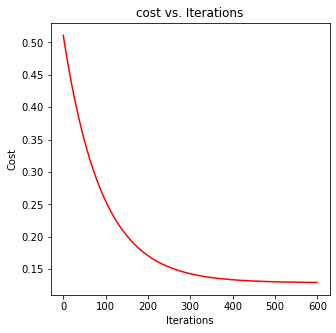

In [26]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(n_iterations), updated_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('cost vs. Iterations')


In [27]:
my_pre=(X_test_matrix * updated_waights.T)

In [28]:
print(my_pre)

[[-3.37795236e-01]
 [-4.77620489e-01]
 [ 1.90009208e+00]
 [-3.01006915e-01]
 [ 1.10717312e+00]
 [-1.88626162e-01]
 [-1.04923807e+00]
 [ 3.45350536e-01]
 [-9.73046918e-01]
 [-1.53866549e-01]
 [ 1.13054337e+00]
 [-2.94182607e-01]
 [-6.46823537e-01]
 [ 2.01551096e+00]
 [ 2.18979976e+00]
 [ 1.91278601e+00]
 [ 1.73697269e-01]
 [ 1.81116943e+00]
 [-3.33434463e-01]
 [ 1.45865354e+00]
 [-8.14680263e-01]
 [-2.67103422e-01]
 [-8.87198460e-01]
 [-4.56384508e-01]
 [-1.58393768e-01]
 [ 1.28699154e-02]
 [ 9.95645020e-02]
 [-5.76781650e-01]
 [-2.55070703e-01]
 [-8.79468817e-01]
 [-3.80868423e-01]
 [ 1.53495576e-02]
 [-6.90642928e-01]
 [-8.12059287e-01]
 [-7.25079321e-01]
 [ 3.63707954e-02]
 [-9.42236245e-01]
 [-3.79854236e-01]
 [ 1.59558082e+00]
 [ 1.54838920e+00]
 [-8.15898800e-01]
 [-6.98274591e-01]
 [ 6.18581695e-02]
 [-1.15050038e-01]
 [-3.51208580e-01]
 [-1.02763457e-01]
 [-6.37085360e-01]
 [-8.65320899e-01]
 [ 1.77030371e+00]
 [-3.17880168e-01]
 [ 2.33059669e-01]
 [-8.75059102e-01]
 [-4.1682143

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test , my_pre)

0.24114174228970497

In [31]:
print("***********************cost_test************************")
cost_test=computeCost(X_test_matrix, Y_test_matrix, waights)
cost_test

***********************cost_test************************


0.4998000214065829

In [30]:
print("***********************final_updated_cost_test************************")
final_updated_cost_test=computeCost(X_test_matrix, Y_test_matrix, updated_waights)
final_updated_cost_test

***********************final_updated_cost_test************************


0.12057087114485249

# cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores

In [ ]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=folds)
scores 

In [ ]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
scores

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train) 

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results